In [44]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib as mat
import networkx as nx
import matplotlib.pyplot as plt

In [45]:
data = np.random.rand(10,6)


In [75]:
columns = ['SS_H', 'SS_S', 'SS_St', 'Env', 'TR', 'P']

In [76]:
df = pd.DataFrame(data, columns=columns)

In [77]:
data[:, 0] = np.random.randint(0, 2, size=data.shape[0])

In [78]:
data[:, 1] = np.random.randint(0, 2, size=data.shape[0])

In [79]:
data[:, 2] = np.random.randint(0, 2, size=data.shape[0])

In [80]:
data[:, 3] = np.random.randint(1, 6, size=data.shape[0])

In [81]:
data[:, 4] = np.random.randint(1, 6, size=data.shape[0])

In [82]:
data[:, 5] = np.random.randint(1, 6, size=data.shape[0])

In [83]:
print(df)

   SS_H  SS_S  SS_St  Env   TR    P
0   1.0   1.0    1.0  4.0  4.0  5.0
1   1.0   0.0    1.0  1.0  2.0  5.0
2   1.0   0.0    0.0  5.0  1.0  3.0
3   0.0   1.0    1.0  4.0  1.0  5.0
4   0.0   1.0    0.0  2.0  4.0  5.0
5   0.0   1.0    0.0  5.0  1.0  1.0
6   1.0   1.0    0.0  4.0  1.0  4.0
7   0.0   0.0    1.0  1.0  5.0  5.0
8   1.0   1.0    0.0  4.0  4.0  4.0
9   1.0   1.0    1.0  2.0  4.0  1.0


In [84]:
G = nx.Graph()

In [85]:
for col in columns[:3]:  # SS1, SS2, SS3
    for subcategory in range(2):  # Subcategories 0 and 1
        subnode = f"{col}_{subcategory}"
        G.add_node(subnode)


In [110]:
for col in columns[3:]:  # Env, TR, P
    for value in range(1, 6):  # Assuming values range from 1 to 6 for Env, TR, and P
        subnode = f"{col}_{value}"
        G.add_node(subnode)


In [111]:
for i, row in enumerate(data):
    # 1. Create edges between SS nodes if both are active (SS1_1, SS2_1, SS3_1)
    for col1 in range(3):  # SS1, SS2, SS3 (indices 0, 1, 2)
        for col2 in range(3):  # SS1, SS2, SS3 (indices 0, 1, 2)
            if col1 != col2:  # Avoid self-loops
                if row[col1] == 1 and row[col2] == 1:  # Both emotional states active
                    G.add_edge(f"{columns[col1]}_1", f"{columns[col2]}_1", weight=1)

In [112]:
 for col in range(3):  # SS1, SS2, SS3 (indices 0, 1, 2)
        if row[col] == 1:  # If the SS node is active (1)
            for var_index, var in enumerate(columns[3:]):  # Env, TR, P (indices 3, 4, 5)
                var_value = row[3 + var_index]  # Corresponding Env, TR, or P value
                # Add edge from SS subnode to Env/TR/P subnode
                G.add_edge(f"{columns[col]}_1", f"{var}_{var_value}", weight=1)

In [113]:
for col1 in range(3, 6):  # Env, TR, P (indices 3, 4, 5)
        for col2 in range(3, 6):  # Env, TR, P (indices 3, 4, 5)
            if col1 != col2:  # Avoid self-loops
                var1_value = row[col1]  # Value for Env, TR, or P
                var2_value = row[col2]  # Value for Env, TR, or P
                if var1_value != var2_value:  # Optional: Only create edges if values are different
                    G.add_edge(f"{columns[col1]}_{int(var1_value)}", f"{columns[col2]}_{int(var2_value)}", weight=1)

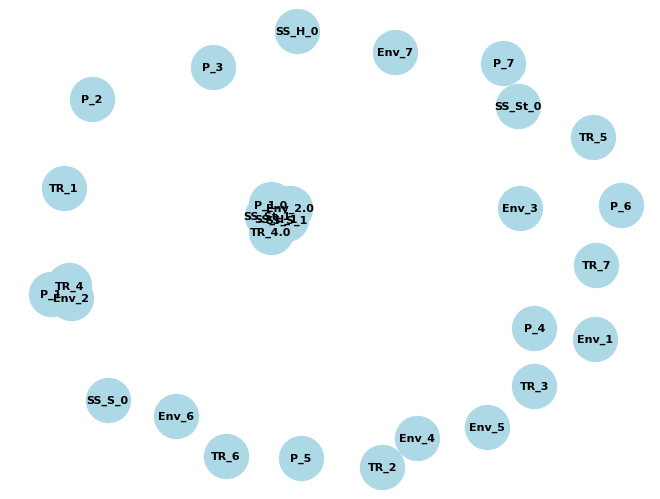

In [114]:
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')


{('SS_H_1', 'SS_S_1'): Text(-0.16567057278938332, 0.16666357944488028, '1'),
 ('SS_H_1', 'SS_St_1'): Text(-0.2145639596098473, 0.17955323234584977, '1'),
 ('SS_H_1', 'Env_2.0'): Text(-0.1682489222255545, 0.1923230499525502, '1'),
 ('SS_H_1', 'TR_4.0'): Text(-0.1994092981913705, 0.140062424982367, '1'),
 ('SS_H_1', 'P_1.0'): Text(-0.2000377724109646, 0.2002828966502286, '1'),
 ('SS_S_1', 'SS_St_1'): Text(-0.1896369150390712, 0.17464334349872981, '1'),
 ('SS_S_1', 'Env_2.0'): Text(-0.15151582832988442, 0.1914577250240078, '1'),
 ('SS_S_1', 'TR_4.0'): Text(-0.18267680644524015, 0.13919706315809424, '1'),
 ('SS_S_1', 'P_1.0'): Text(-0.1833051329783255, 0.19942424702036146, '1'),
 ('SS_St_1', 'Env_2.0'): Text(-0.18348648739980064, 0.19985811256697808, '1'),
 ('SS_St_1', 'TR_4.0'): Text(-0.21465665649330845, 0.14759025551291785, '1'),
 ('SS_St_1', 'P_1.0'): Text(-0.2152874386453586, 0.20781370612526942, '1'),
 ('Env_2', 'TR_4'): Text(-0.8690258970805311, -0.15421201789880662, '1'),
 ('Env_2'

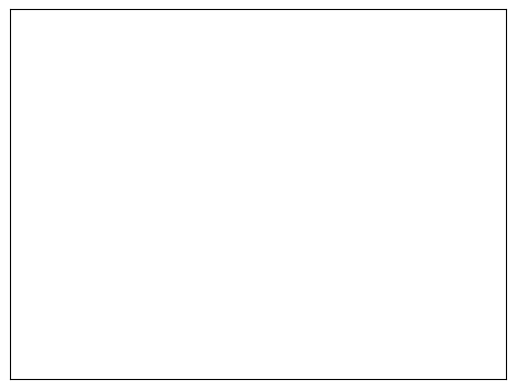

In [115]:
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


In [116]:
print(G.edges())

[('SS_H_1', 'SS_S_1'), ('SS_H_1', 'SS_St_1'), ('SS_H_1', 'Env_2.0'), ('SS_H_1', 'TR_4.0'), ('SS_H_1', 'P_1.0'), ('SS_S_1', 'SS_St_1'), ('SS_S_1', 'Env_2.0'), ('SS_S_1', 'TR_4.0'), ('SS_S_1', 'P_1.0'), ('SS_St_1', 'Env_2.0'), ('SS_St_1', 'TR_4.0'), ('SS_St_1', 'P_1.0'), ('Env_2', 'TR_4'), ('Env_2', 'P_1'), ('TR_4', 'P_1')]


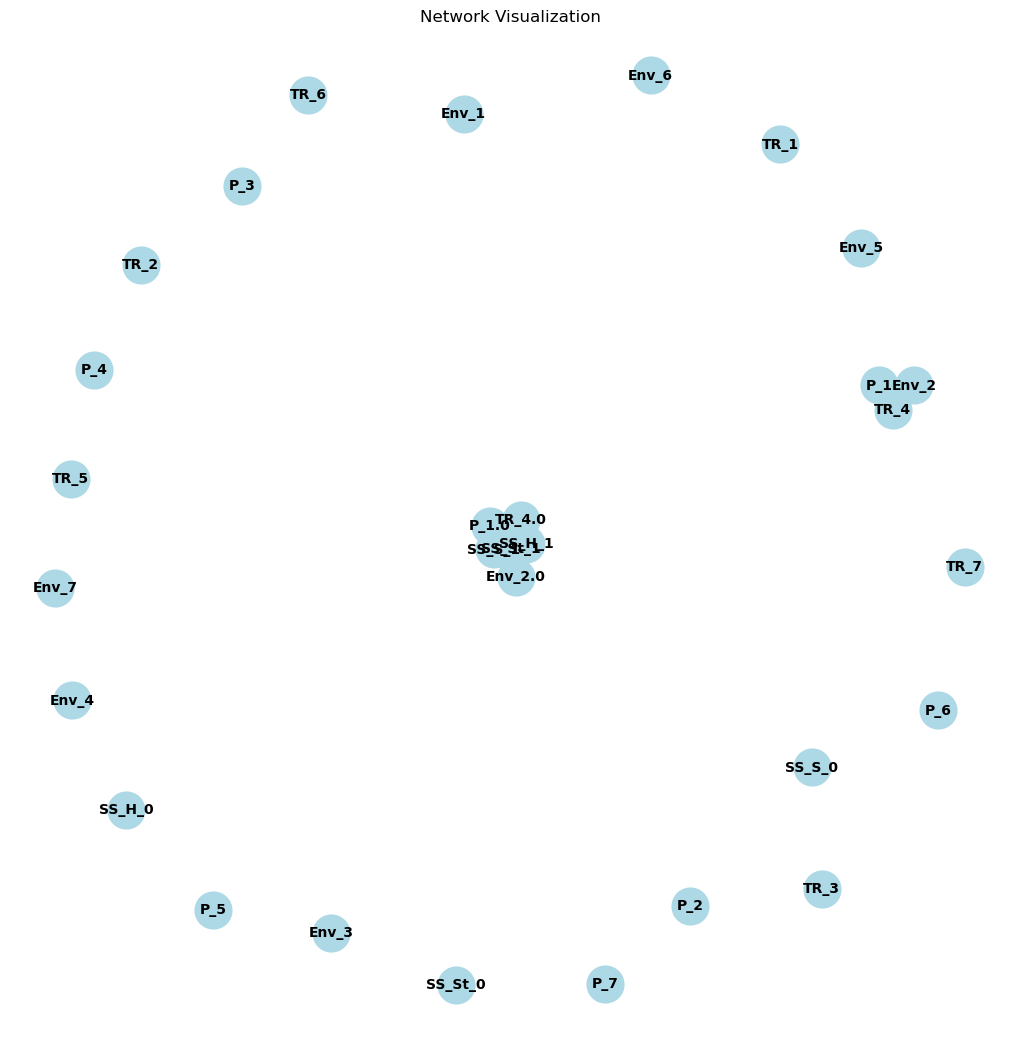

In [106]:
# Visualize the graph
plt.figure(figsize=(10, 10))  # Set the figure size for clarity
nx.draw(G, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Network Visualization")
plt.show()


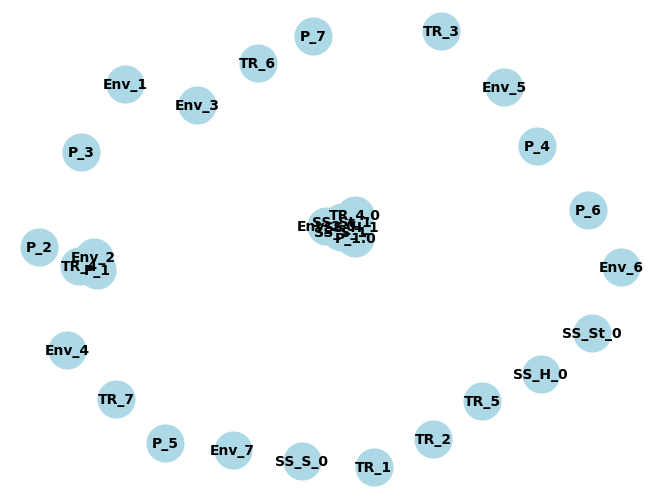

In [107]:
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color=edge_weights, width=2.0)
plt.show()

In [108]:
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]
print(f"Isolated nodes: {isolated_nodes}")

Isolated nodes: ['SS_H_0', 'SS_S_0', 'SS_St_0', 'Env_1', 'Env_3', 'Env_4', 'Env_5', 'Env_6', 'Env_7', 'TR_1', 'TR_2', 'TR_3', 'TR_5', 'TR_6', 'TR_7', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7']


In [109]:
print(subnode)


P_5
